# Importing important libraries



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [20]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Gathering the data

In [21]:
train_data=pd.read_csv(r"D:\Prodigy InfoTech\archive\train.csv")

In [22]:
train_data.shape

(891, 12)

In [8]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
train_data.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

#### From common sense, columns such as PassengerId, Name and Ticket number shouldn't be related to the survival probability

# Data cleaning and validation

In [23]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### there are missing values in Age and Cabin columns which needs to be handeled properly.

In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**In the training set:**

**1- 38.3% people survived**

**2- More number of people were actually in 3rd class**

**3- 50% of passengers were in between the age of 20 to 38**

**Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. So accuracy cannot be considered as the only measure in saying how good the model is.**

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### It indicates that there are total of 891 passesnger details among which 177 people's Age is missing and 687 people's Cabin details are missing. And 2 people's Embarkation details are missing.

# Exploratory Data Analysis

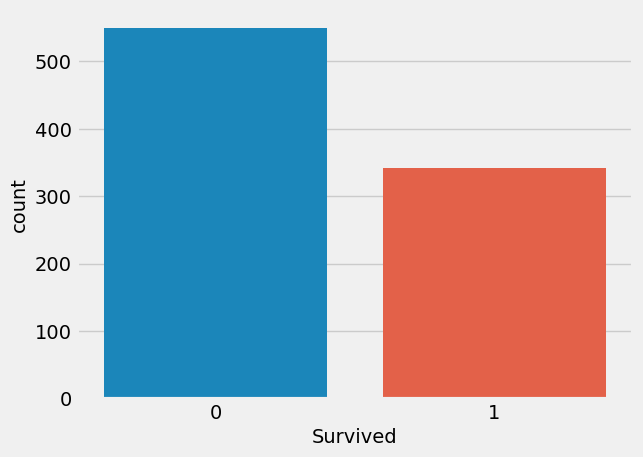

In [26]:
sb.countplot(x='Survived', data=train_data)
plt.show()

From the above graph it is clear that not many persons survived.
Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Here we'll explore features

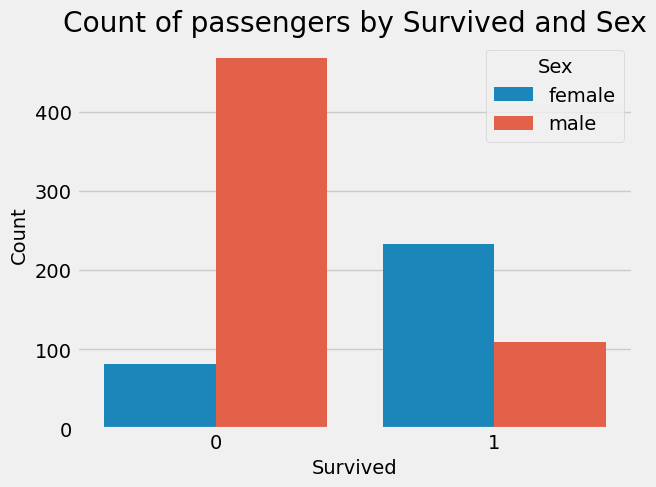

In [37]:
# Group the data by 'Survived' and 'Sex' columns and count the number of rows in each group
grouped_data = train_data.groupby(['Survived','Sex'])['Survived'].count()

# Reset the index to create a DataFrame
pivoted_df = grouped_data.reset_index(name='count')
# Plot the data using seaborn bar plot
sb.barplot(x='Survived', y='count', hue='Sex', data=pivoted_df)
# Set plot labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of passengers by Survived and Sex')
plt.show()


In [39]:
train_data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

It is clear that 233 female survived out of 344. And out of 549 male 109 survived. The survival ratio of female is much greater than that of male. It can be seen clearly in following graph

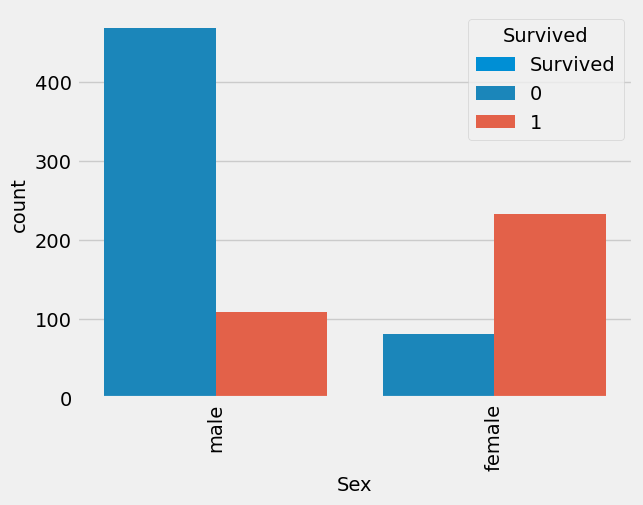

In [41]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sb.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

Let's explore more features

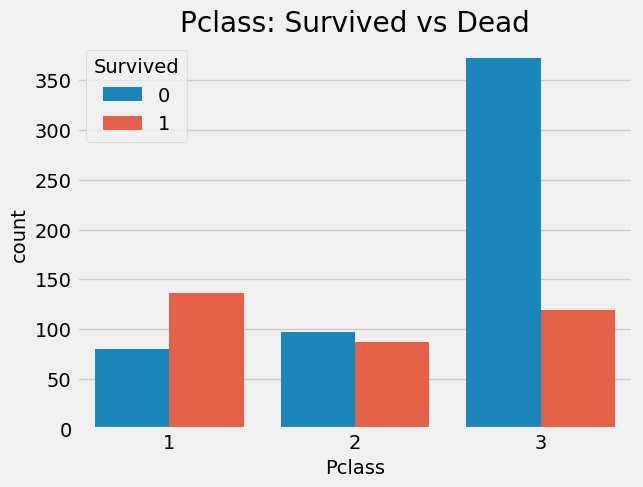

In [43]:
sb.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Survived vs Dead')
plt.show()

Wow.... That looks amazing. It is usually said that Money can't buy Everything, But it is clearly seen that pasangers of Class 1 are given high priority while Rescue. There are greater number of passangers in Class 3 than Class 1 and Class 2 but very few, almost 25% in Class 3 survived. In Class 2, survivail and non-survival rate is 49% and 51% approx.
While in Class 1 almost 68% people survived. So money and status matters here.

Let's dive in again into data to check more interesting observations.

In [44]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

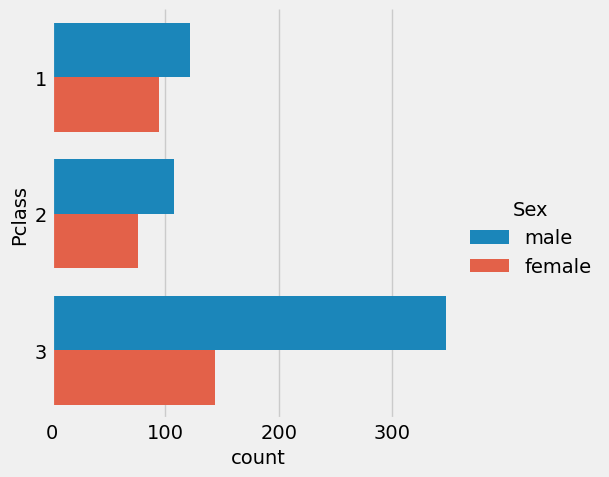

In [48]:
sb.catplot(x=None, y='Pclass', hue='Sex', data=train_data, kind='count')
plt.show()

In [49]:
print('Oldest person Survived was of:',train_data['Age'].max())
print('Youngest person Survived was of:',train_data['Age'].min())
print('Average person Survived was of:',train_data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


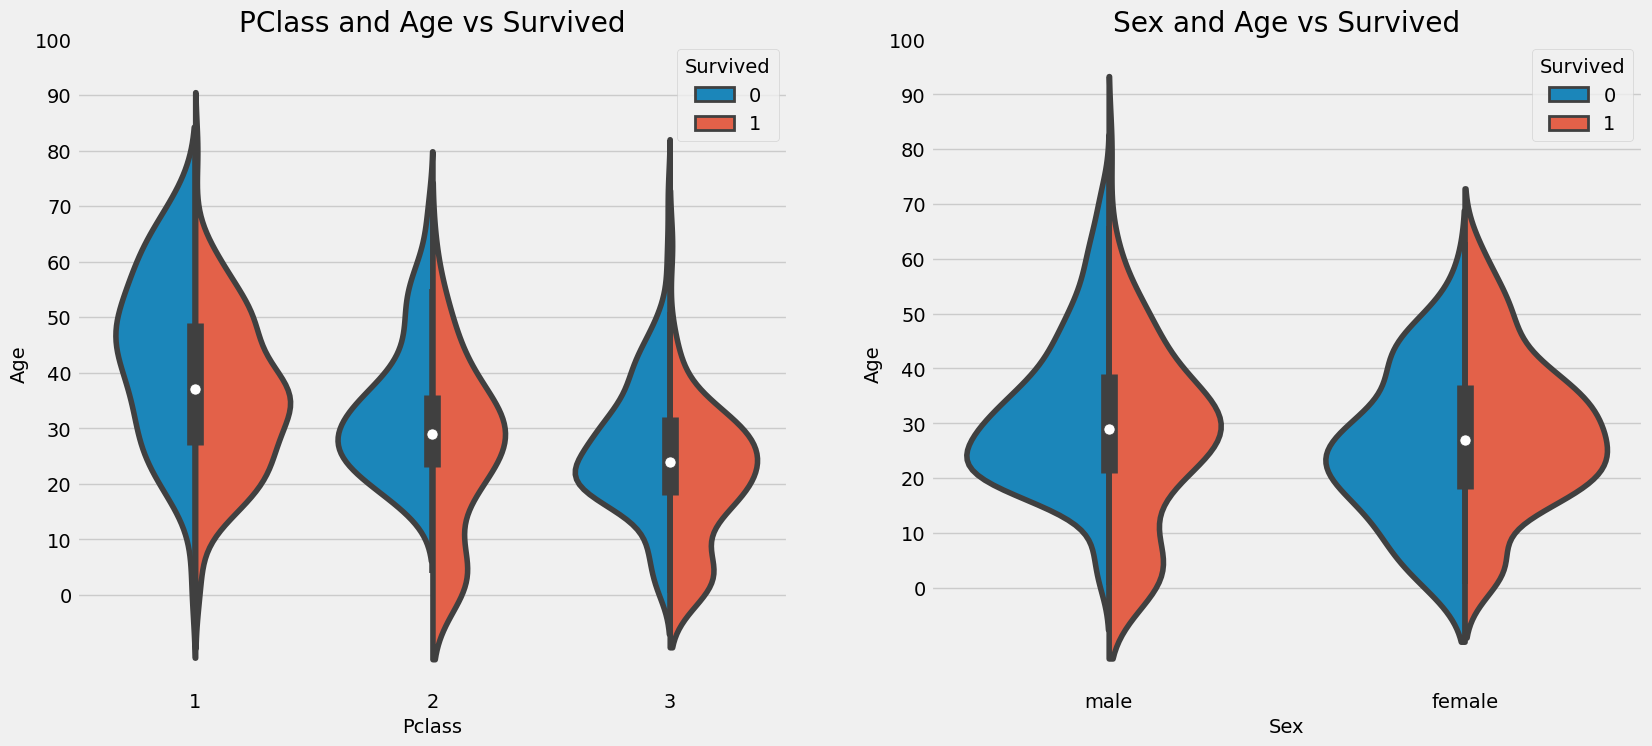

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sb.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

From above violen plots, following observations are clear,
1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 
2) Survival rate of children, for age 10 and below is good irrespective of Class
3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. 
Let's do something more interesting with dataset by exploring more.

What is, if I look at 'Name' feature, It looks interesting. Let's check it....

In [52]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.') #extracting Name initials

In [53]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many names which are not relevant like Mr, Mrs etc. So I will replace them with some relevant names,

In [54]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [55]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [56]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Other'),'Age']=46

In [57]:
train_data.Age.isnull().any()


False

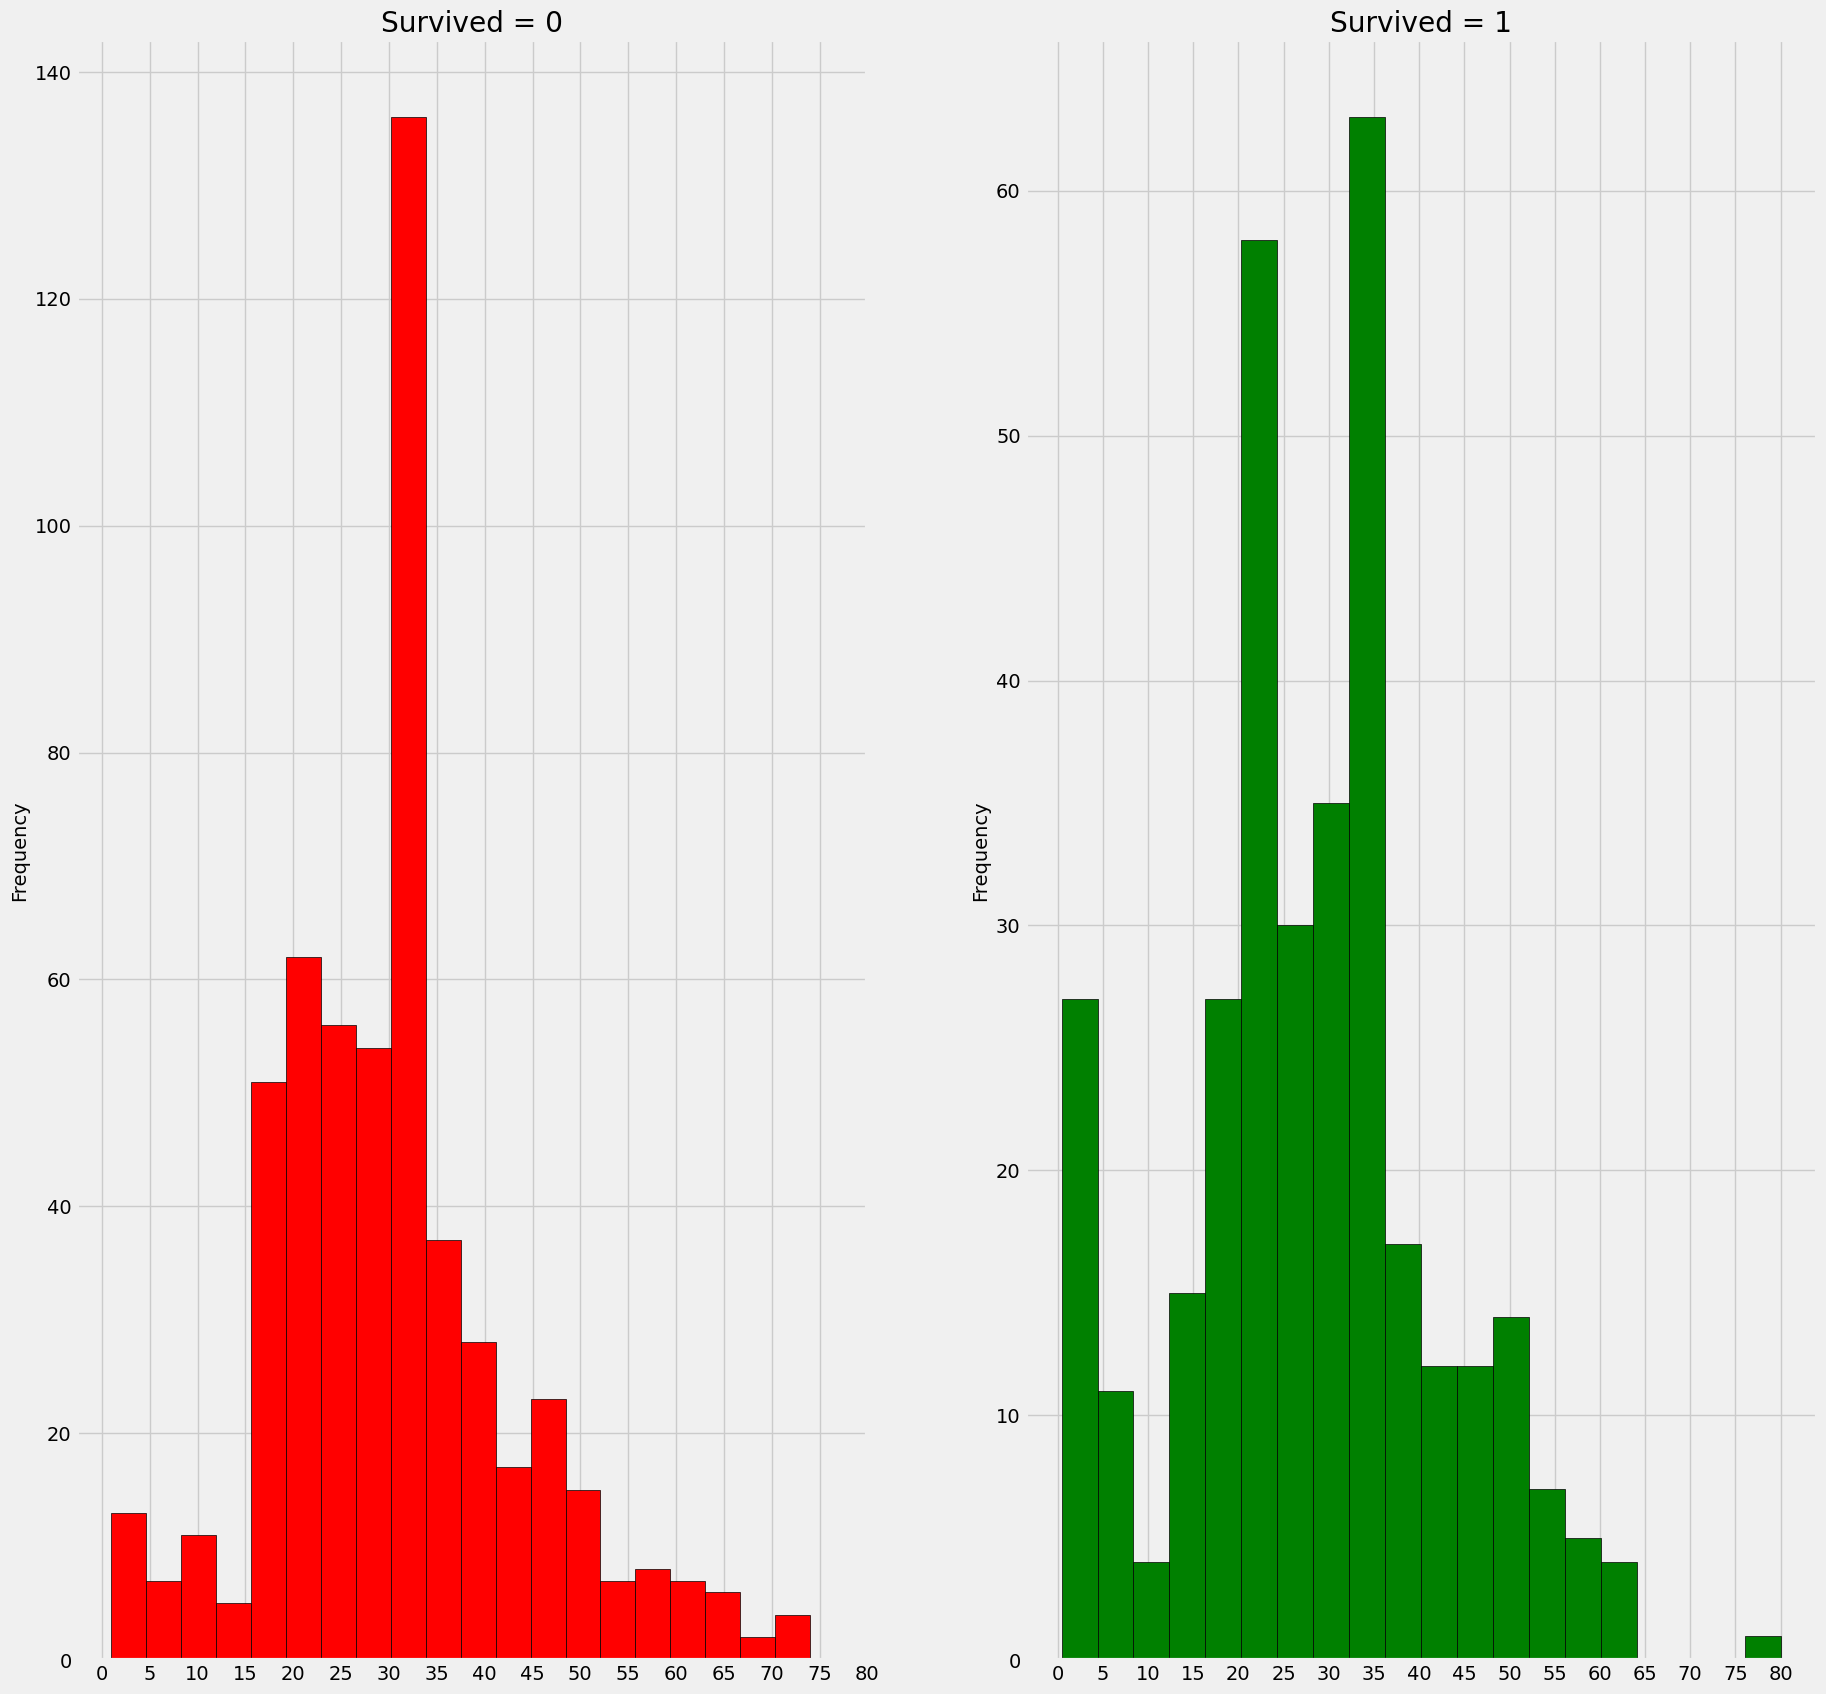

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()


From the above plots, I found the following observations


(1) First priority during Rescue is given to children and women, as the persons<5 are save by large numbers
(2) The oldest saved passanger is of 80
(3) The most deaths were between 30-40

Let's explore some more

# Feature: Sib Sp

Sib Sp feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc
and Spouse= husband,wife

In [60]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


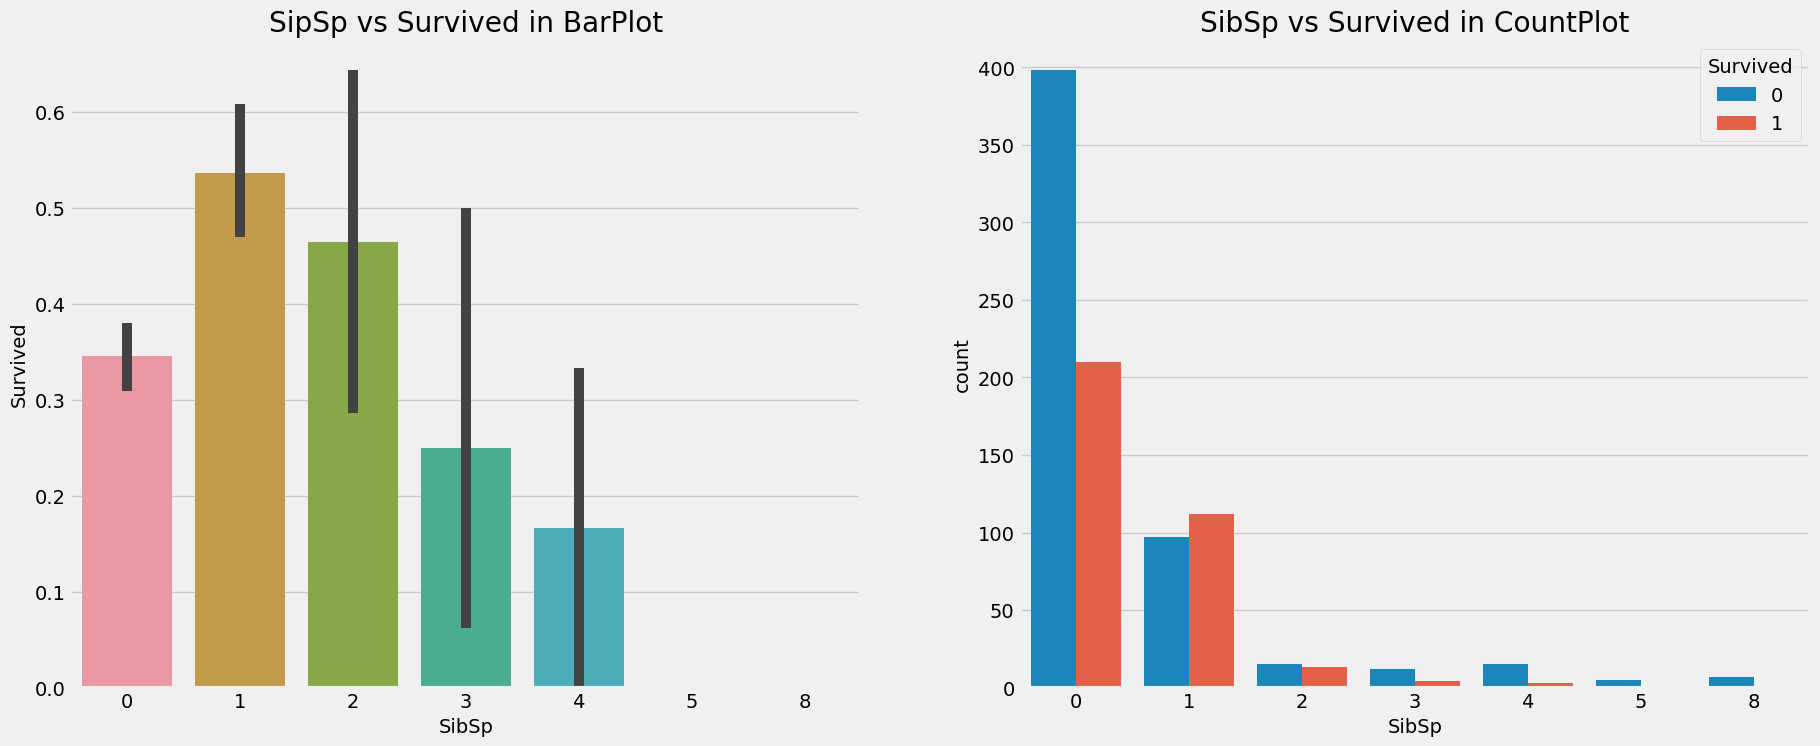

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sb.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sb.countplot(x='SibSp', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('SibSp vs Survived in CountPlot')
plt.close(2)
plt.show()


In [64]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient('summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


There are many interesting facts with this feature. Barplot and FactorPlot shows that if a passanger is alone in ship with no siblings, survival rate is 34.5%. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there's something wrong, the survival rate for families with 5-8 members is 0%. Is this because of PClass?
Yes this is PClass,  The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

That are some interesting facts we have observed with Titanic dataset.